In [2]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import json
sns.set(style='ticks', font_scale=1.6, font='times')
sns.set_palette('colorblind')
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
table = NasaExoplanetArchive.query_criteria(table="pscomppars")
df = pd.DataFrame({c: table[c] for c in table.columns})

UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]


In [4]:
print(df.columns.values)

['pl_name' 'pl_letter' 'hostname' 'hd_name' 'hip_name' 'tic_id'
 'disc_pubdate' 'disc_year' 'discoverymethod' 'disc_locale'
 'disc_facility' 'disc_instrument' 'disc_telescope' 'disc_refname' 'ra'
 'rastr' 'dec' 'decstr' 'glon' 'glat' 'elon' 'elat' 'ra_reflink'
 'pl_orbper' 'pl_orbpererr1' 'pl_orbpererr2' 'pl_orbperlim' 'pl_orbperstr'
 'pl_orbper_reflink' 'pl_orblpererr1' 'pl_orblper' 'pl_orblpererr2'
 'pl_orblperlim' 'pl_orblperstr' 'pl_orblper_reflink' 'pl_orbsmax'
 'pl_orbsmaxerr1' 'pl_orbsmaxerr2' 'pl_orbsmaxlim' 'pl_orbsmaxstr'
 'pl_orbsmax_reflink' 'pl_orbincl' 'pl_orbinclerr1' 'pl_orbinclerr2'
 'pl_orbincllim' 'pl_orbinclstr' 'pl_orbincl_reflink' 'pl_orbtper'
 'pl_orbtpererr1' 'pl_orbtpererr2' 'pl_orbtperlim' 'pl_orbtperstr'
 'pl_orbtper_reflink' 'pl_orbeccen' 'pl_orbeccenerr1' 'pl_orbeccenerr2'
 'pl_orbeccenlim' 'pl_orbeccenstr' 'pl_orbeccen_reflink' 'pl_eqt'
 'pl_eqterr1' 'pl_eqterr2' 'pl_eqtlim' 'pl_eqtstr' 'pl_eqt_reflink'
 'pl_occdep' 'pl_occdeperr1' 'pl_occdeperr2' 'pl_occd

In [5]:
TRANSIT = df[df.discoverymethod=='Transit']
RV = df[df.discoverymethod=='Radial Velocity']
ML = df[df.discoverymethod=='Microlensing']
DI = df[df.discoverymethod=='Imaging']
OTHER = df[(df.discoverymethod!='Imaging') & (df.discoverymethod!='Transit') &
           (df.discoverymethod!='Radial Velocity') & (df.discoverymethod!='Microlensing')]

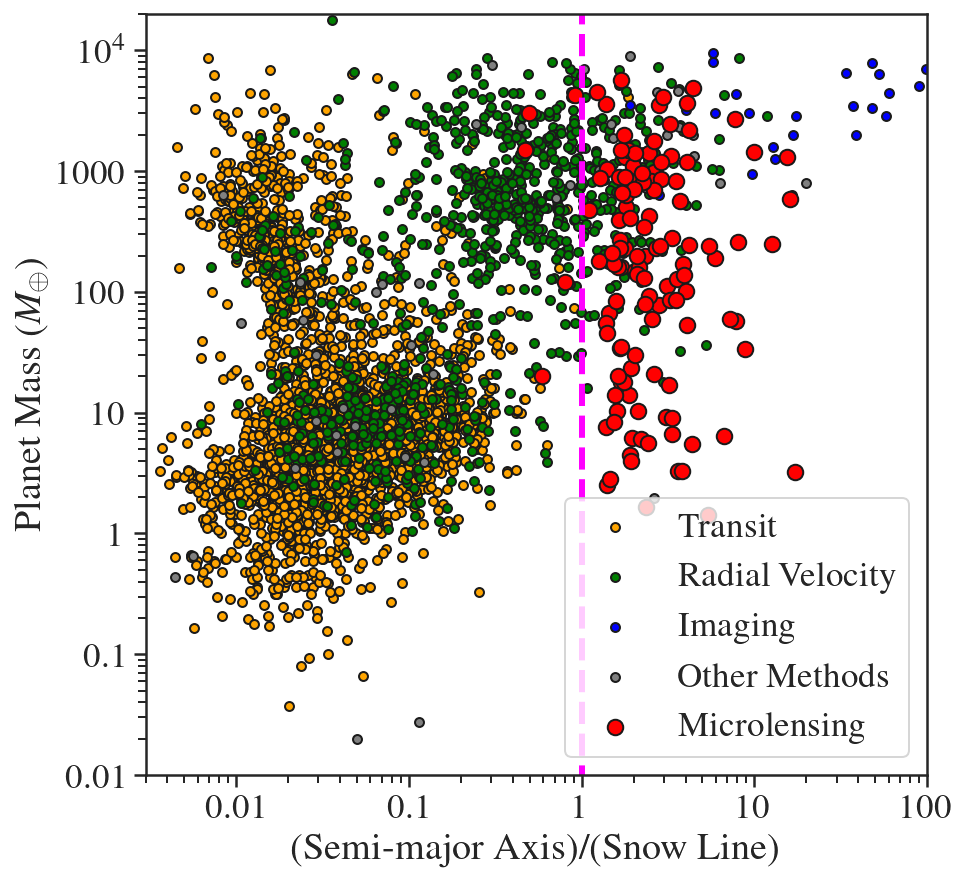

In [6]:
fig,ax = pl.subplots(figsize=(7,7))
sns.set(style='ticks', font_scale=1.6, font='Times')

pl.scatter(TRANSIT.pl_orbsmax/(2.7*TRANSIT.st_mass),TRANSIT.pl_bmasse,color="orange",edgecolor="k",s=20)
pl.scatter(RV.pl_orbsmax/(2.7*RV.st_mass),RV.pl_bmasse,color="green",edgecolor="k",s=20)
pl.scatter(DI.pl_orbsmax/(2.7*DI.st_mass),DI.pl_bmasse,color="blue",edgecolor="k",s=20)
pl.scatter(OTHER.pl_orbsmax/(2.7*OTHER.st_mass),OTHER.pl_bmasse,color="gray",edgecolor="k",s=20)
pl.scatter(ML.pl_orbsmax/(2.7*ML.st_mass),ML.pl_bmasse,color="red",edgecolor="k",s=60)
pl.vlines(1,1e-5,1e+10,colors="magenta",lw=3,linestyle="--")

pl.loglog()
ax.legend(["Transit","Radial Velocity","Imaging","Other Methods","Microlensing"])
ax.set_xlim(0.003,100)
ax.set_ylim(0.01,2e+4)
xpos = [0.01,0.1,1, 10, 100,] 
xticks = ['0.01','0.1','1', '10', '100',]
ax.set_xticks(xpos)
ax.set_xticklabels(xticks)
ypos = [0.01,0.1,1, 10, 100,1e+3,1e+4] 
yticks = ['0.01','0.1','1', '10', '100','1000',r'$10^4$']
ax.set_yticks(ypos)
ax.set_yticklabels(yticks)
ax.set_xlabel("(Semi-major Axis)/(Snow Line)")
ax.set_ylabel(r"Planet Mass ($M_{\oplus}$)")
pl.show()

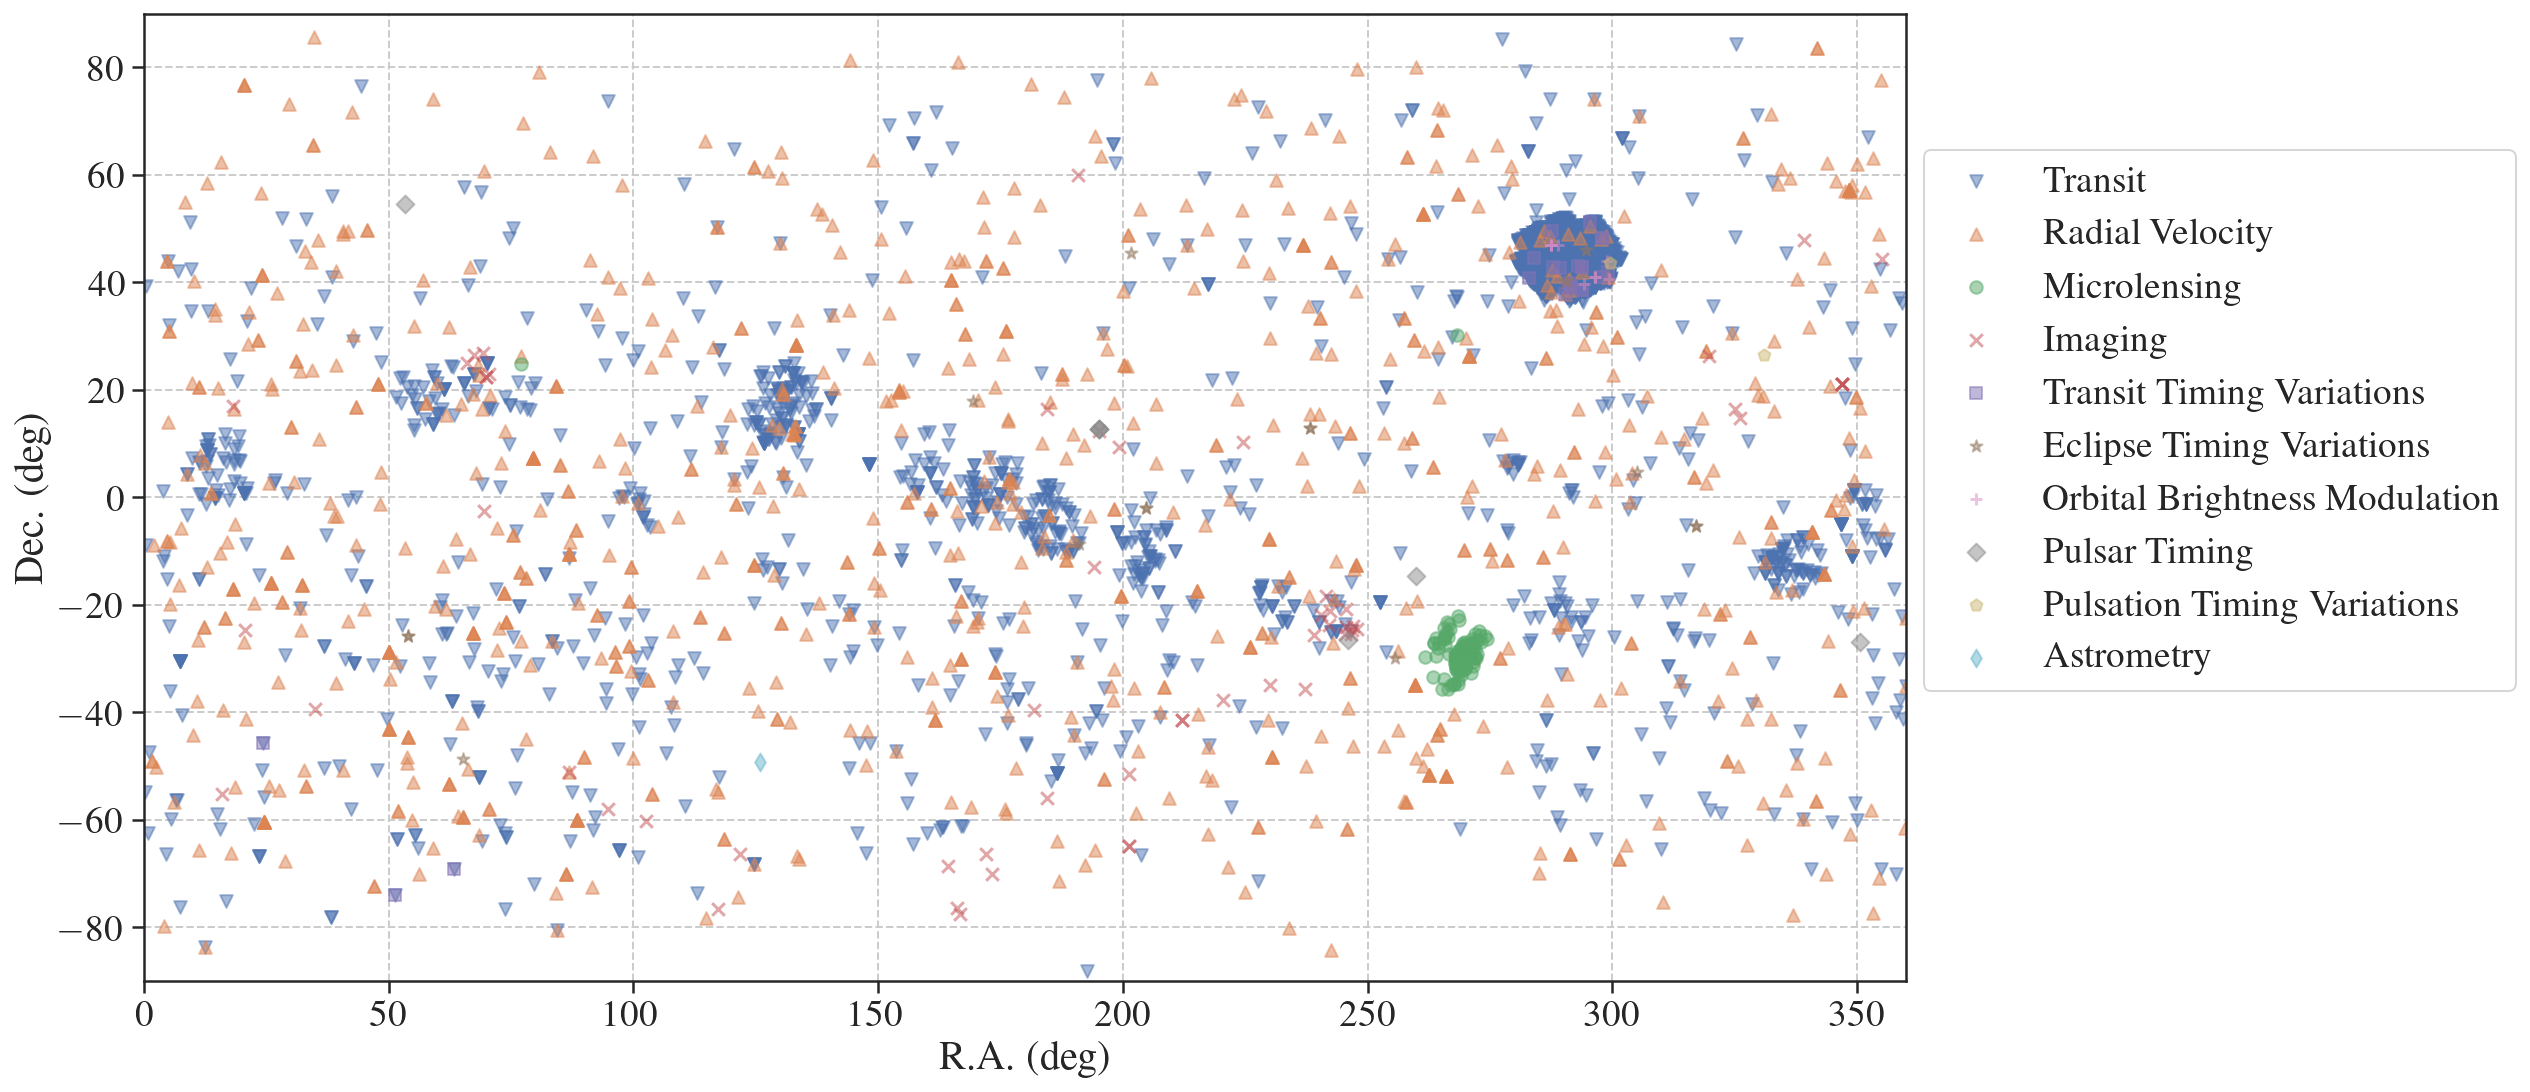

In [7]:
n_discmet = df.groupby('discoverymethod').apply(len).sort_values(ascending=False)
lis_discmet = n_discmet.index

marker = ['v','^','o','x','s','*','+','D','p','d']
sns.set(style='ticks', font_scale=1.7, font='times')
pl.figure(figsize=(18,8))
for d,m in zip(lis_discmet,marker):
    pl.scatter(df.ra[df.discoverymethod==d],df.dec[df.discoverymethod==d],s=40,marker=m,alpha=0.5)
pl.legend(lis_discmet,loc=(1.01,0.3),ncol=1)
pl.grid(ls='--')
pl.xlabel("R.A. (deg)")
pl.ylabel("Dec. (deg)")
#pl.axis("equal",emit=False)
pl.xlim(0,360)
pl.ylim(-90,90)
pl.tight_layout()
pl.show();

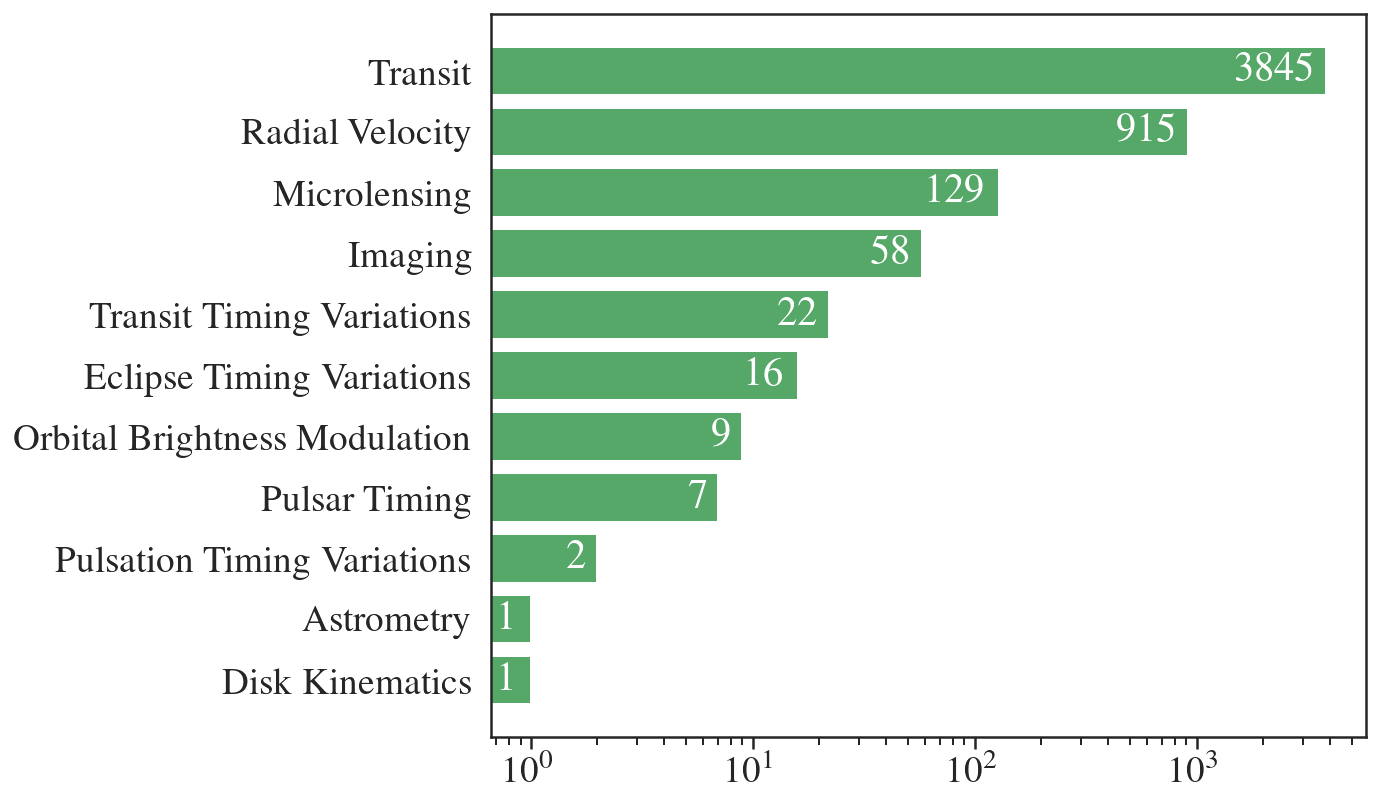

In [11]:
n_discmet = df.groupby('discoverymethod').apply(len).sort_values(ascending=False)
lis_discmet = n_discmet.index

pl.figure(figsize=(10,6))
for i,(dm,n) in enumerate(n_discmet.iteritems()):
    pl.text(n*0.9,i,'%d'%n,ha='right',va='center',color='w')
n_met = len(n_discmet)
pl.barh(range(n_met),n_discmet,color='C2')
pl.yticks(range(n_met),lis_discmet)
pl.semilogx()
pl.tick_params(left=0)
pl.gca().invert_yaxis()
pl.tight_layout()
pl.show()

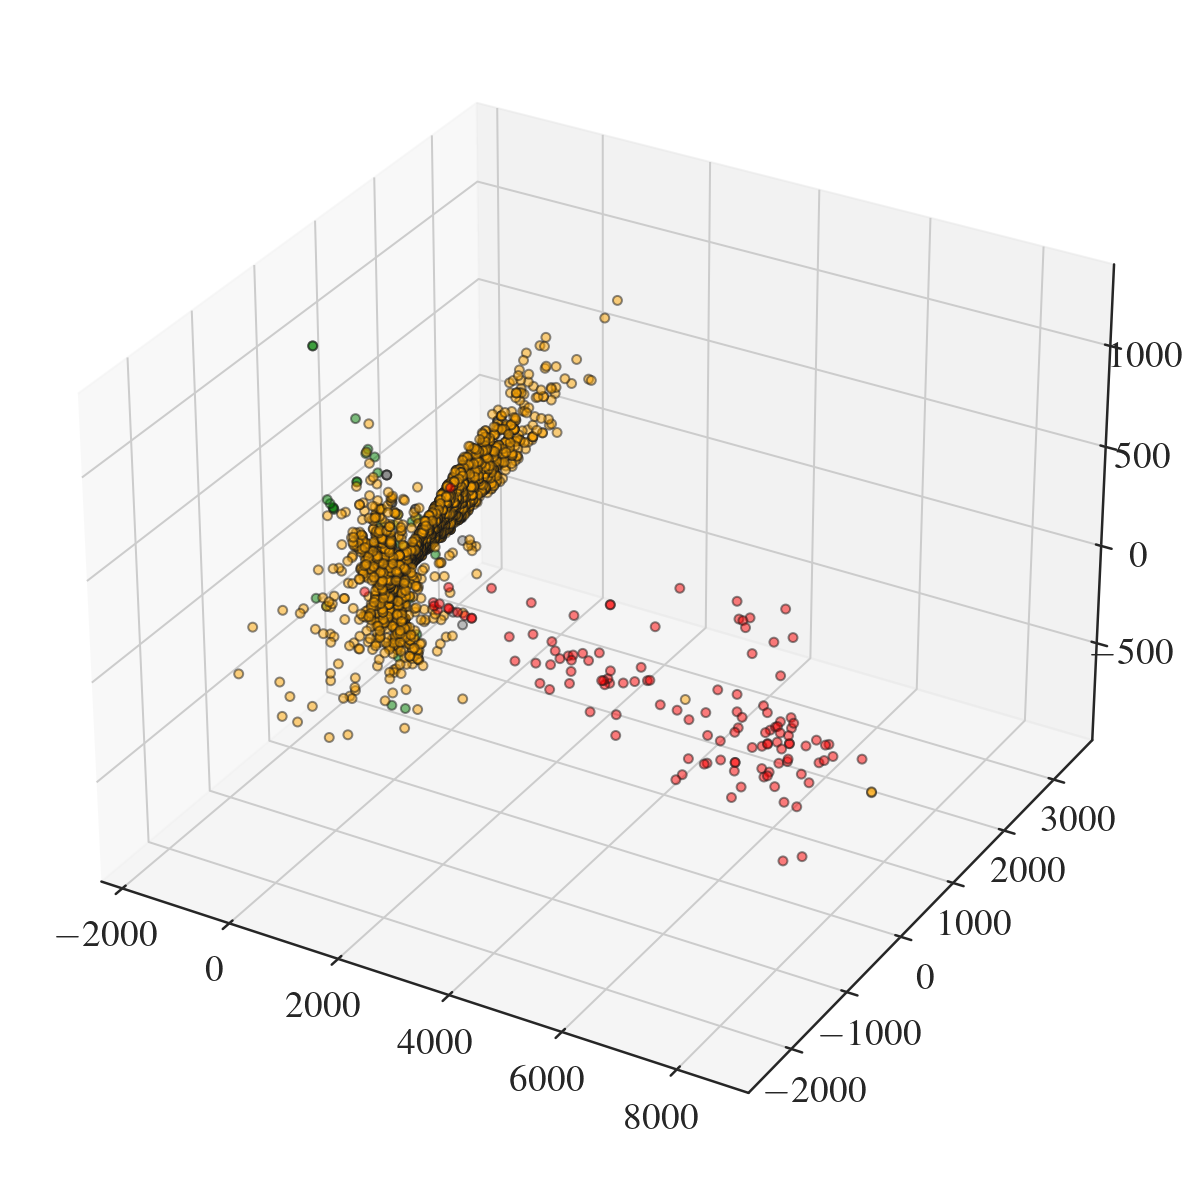

In [17]:
from astropy import units as u
from astropy.coordinates import SkyCoord

PLOT= SkyCoord(ra=df.ra*u.degree, dec=df.dec*u.degree, distance=df.sy_dist*u.pc)
GC = PLOT.galactic
x = GC.distance*np.cos(np.deg2rad(GC.b))*np.cos(np.deg2rad(GC.l))
y = GC.distance*np.cos(np.deg2rad(GC.b))*np.sin(np.deg2rad(GC.l))
z = GC.distance*np.sin(np.deg2rad(GC.b))

pl.figure(figsize=[12,8])
#ax = Axes3D(fig)
ax = pl.axes([0,0,1,1],projection='3d')
c = df.discoverymethod=='Radial Velocity'
ax.scatter(x[c],y[c],z[c],c='green',edgecolor='k',cmap='rainbow',marker='o',alpha=0.5)
c = df.discoverymethod=='Transit'
ax.scatter(x[c],y[c],z[c],c='orange',edgecolor='k',cmap='rainbow',marker='o',alpha=0.5)
c = df.discoverymethod=='Microlensing'
ax.scatter(x[c],y[c],z[c],c='red',edgecolor='k',cmap='rainbow',marker='o',alpha=0.5)
c = (df.discoverymethod!='Transit')&\
    (df.discoverymethod!='Radial Velocity')&\
    (df.discoverymethod!='Microlensing')
ax.scatter(x[c],y[c],z[c],c='gray',edgecolor='k',cmap='rainbow',marker='o',alpha=0.5)
pl.savefig("../image/pl_space.png")
pl.show()

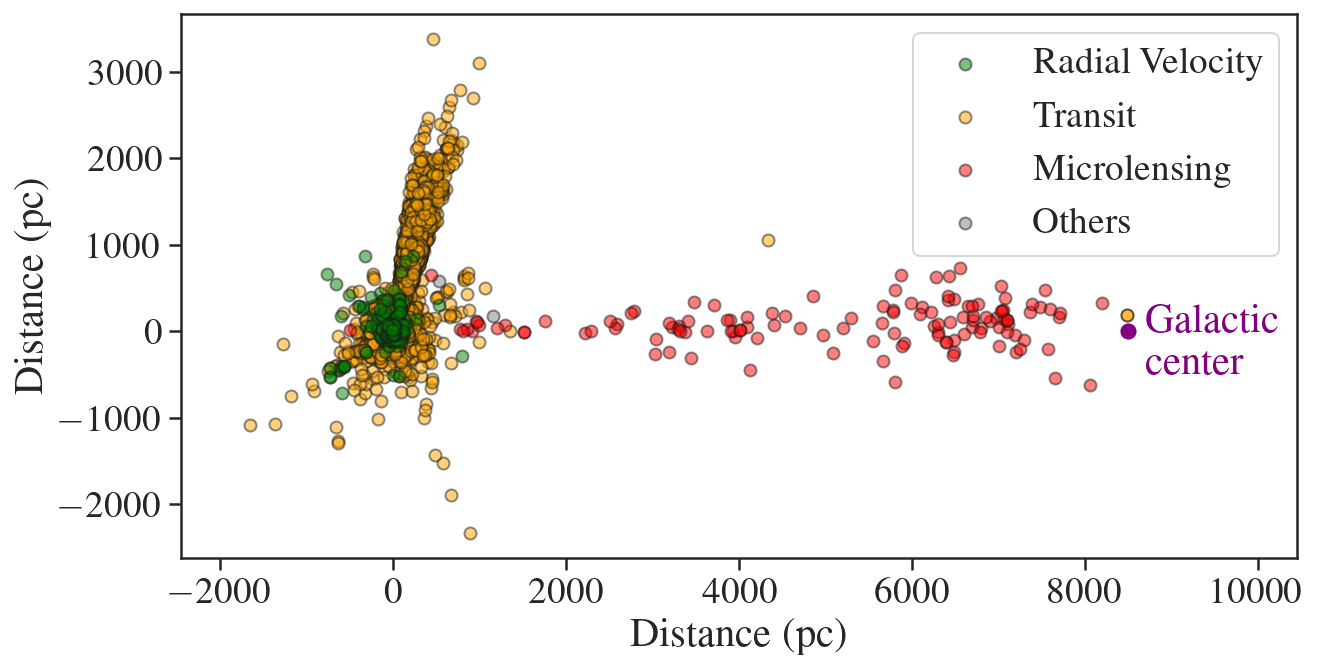

In [20]:
GC = SkyCoord(ra=266.405*u.degree, dec=-28.936167*u.degree, distance=8500*u.pc)
GC = GC.galactic

x_GC = GC.distance*np.cos(np.deg2rad(GC.b))*np.cos(np.deg2rad(GC.l))
y_GC = GC.distance*np.cos(np.deg2rad(GC.b))*np.sin(np.deg2rad(GC.l))

fig = pl.figure(figsize=[10,5])
ax = pl.subplot()
c = df.discoverymethod=='Radial Velocity'
ax.scatter(x[c],y[c],c='green',edgecolor='k',marker='o',alpha=0.5)
c = df.discoverymethod=='Transit'
ax.scatter(x[c],y[c],c='orange',edgecolor='k',marker='o',alpha=0.5,zorder=-1)
c = df.discoverymethod=='Microlensing'
ax.scatter(x[c],y[c],c='red',edgecolor='k',marker='o',alpha=0.5)
c = (df.discoverymethod!='Transit')&\
    (df.discoverymethod!='Radial Velocity')&\
    (df.discoverymethod!='Microlensing')
ax.scatter(x[c],y[c],c='gray',edgecolor='k',marker='o',alpha=0.5,zorder=-2)

pl.legend(["Radial Velocity","Transit","Microlensing","Others"])

ax.scatter(x_GC,y_GC,c="purple",s=50,marker="o")
x_GC = np.array(x_GC)
y_GC = np.array(y_GC)
ax.text(x_GC+200,y_GC-500,"Galactic\n center",c="purple")
pl.axis('equal')
pl.xlabel("Distance (pc)")
pl.ylabel("Distance (pc)")
pl.xlim(-2000,10000)
pl.savefig("../image/pl_distance.png")
#ax.axis("off")
pl.show()

